In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\NLP\Corona_NLP_test.csv',encoding='latin1')

In [3]:
df_train=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\NLP\Corona_NLP_train.csv', encoding='latin1')

In [4]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [5]:
df_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df_test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [9]:
df_train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
df_train=df_train[['OriginalTweet','Sentiment']]

In [11]:
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [12]:
df_test=df_test[['OriginalTweet','Sentiment']]

In [13]:
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [14]:
df_train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [15]:
df_test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

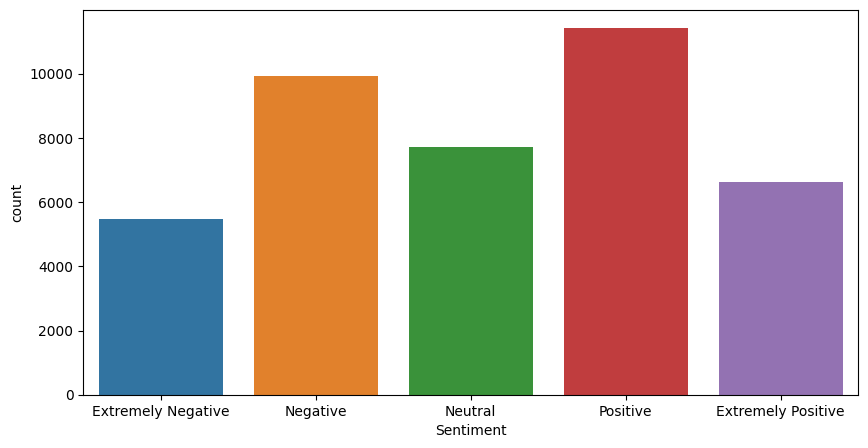

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df_train, order=['Extremely Negative', 'Negative', 'Neutral','Positive', 'Extremely Positive'])

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

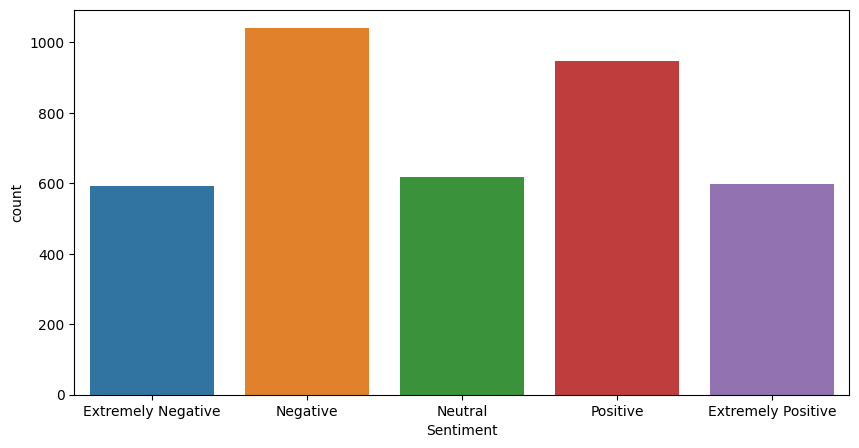

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df_test, order=['Extremely Negative', 'Negative', 'Neutral','Positive', 'Extremely Positive'])

In [18]:
import re
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
#test_tweet=[]
#reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
#for i in df_test['OriginalTweet']:
    #test_tweet.append(reg.sub(" ", i))
#df_test = pd.concat([df_test, pd.DataFrame(test_tweet, columns=["CleanedTweet"])], axis=1, sort=False)
#stop_words = set(stopwords.words('english'))

In [23]:
#train_tweet=[]
#reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
#for i in df_train['OriginalTweet']:
    #train_tweet.append(reg.sub(" ", i))
#df_train = pd.concat([df_train, pd.DataFrame(train_tweet, columns=["CleanedTweet"])], axis=1, sort=False)
#stop_words = set(stopwords.words('english'))

In [24]:
train_corpus=[]

In [25]:
for i in range (0,41157):
    OriginalTweet=re.sub(("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)"), ' ', df_train['OriginalTweet'][i])
    OriginalTweet=OriginalTweet.lower()
    OriginalTweet=OriginalTweet.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    OriginalTweet=[ps.stem(word) for word in OriginalTweet if not word in set(all_stopwords)]
    OriginalTweet=''.join(OriginalTweet)
    train_corpus.append(OriginalTweet)

In [26]:
train_corpus[-5:]

['airlinpilotofferstocksupermarketshelvlockdown19httpcocz89ua0hnp',
 'responscomplaintnotprovidcitecovid19relatdelayyetpromptrejectpoliciconsumtatwaygo',
 'knowgettoughrationtoiletpapermartinsvilhelpus',
 'wrongsmellhandsanitstartturn',
 'wellnewuseriftgo70000amazonrnalthoughnormalmarketpriceusual40000pricereallicrazirightvrheadsetsinchlalexannouncworscovid19wheth']

In [27]:
test_corpus=[]

In [28]:
for i in range (0,3798):
    OriginalTweet=re.sub(("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)"), ' ', df_test['OriginalTweet'][i])
    OriginalTweet=OriginalTweet.lower()
    OriginalTweet=OriginalTweet.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    OriginalTweet=[ps.stem(word) for word in OriginalTweet if not word in set(all_stopwords)]
    OriginalTweet=''.join(OriginalTweet)
    test_corpus.append(OriginalTweet)

In [29]:
test_corpus[-5:]

['meanwhilsupermarketisraelpeopldancsingtogethstayposithttpcovllqgi3r16',
 'panicbuylotnonperishitemechoneedfooddonatalsolookvoluntpackboxvoluntscreensurecovid19httpcotst4vjhbu4',
 'asstprofeconomtalkrecentresearchcoronaviruimpacteconomiwatchstart33httpco8tfynoro5l',
 'govneedsomethinsteadbiarjerakyatassumlockdownkeevenworstharinisemuasupermarketcrowdlikehelllagimudahvirututersebar',
 'membercommitsafetiemployeendusermonitorcovid19restassurtissumanufacturcontinuproducshipproducthttpcoqf6hclcaeqhttpcoxyvbnsfexa']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv=CountVectorizer(max_features=1500)

In [32]:
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [33]:
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [34]:
x=cv.fit_transform(train_corpus).toarray()

In [35]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
y=df_train.iloc[:,-1].values

In [37]:
y

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Negative'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df_train['Sentiment'])

In [39]:
y

array([3, 4, 4, ..., 4, 3, 2])

In [40]:
df_test=cv.fit_transform(test_corpus).toarray()

In [41]:
df_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
x.shape, y.shape, df_test.shape

((41157, 1500), (41157,), (3798, 1500))

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [44]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [45]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 3]
 [4 2]
 [4 4]
 ...
 [4 3]
 [4 3]
 [4 4]]


In [46]:
model.score(x_train,y_train)

0.3049050873196659

In [47]:
model.score(x_test, y_test)

0.28061224489795916

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   2    0    0    0 1092]
 [   0    4    0    0 1327]
 [   0    0    6    1 1979]
 [   0    0    0    3 1523]
 [   0    0    0    0 2295]]


In [49]:
# this model is not working so we use logistic method

In [50]:
df_train1=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\NLP\Corona_NLP_train.csv', encoding='latin1')

In [51]:
df_test1=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\NLP\Corona_NLP_test.csv', encoding='latin1')

In [52]:
df_train1=df_train1[['OriginalTweet','Sentiment']]

In [53]:
df_test1=df_test1[['OriginalTweet','Sentiment']]

In [54]:
df_train1

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [55]:
df_test1

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [56]:
df_train1.replace({'Sentiment' : { 'Extremely Negative' :0, 'Negative' : 0, 'Neutral' : "N",
                              'Extremely Positive' :1, 'Positive' : 1, }},inplace=True)
df_train1.Sentiment.value_counts()

1    18046
0    15398
N     7713
Name: Sentiment, dtype: int64

In [57]:
df_train1

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,N
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
41152,Airline pilots offering to stock supermarket s...,N
41153,Response to complaint not provided citing COVI...,0
41154,You know itÂs getting tough when @KameronWild...,1
41155,Is it wrong that the smell of hand sanitizer i...,N


In [58]:
df_train1=df_train1[df_train1['Sentiment']!='N']

In [59]:
df_train1

,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0
5,As news of the regionÂs first confirmed COVID...,1
...,...,...
41150,I never that weÂd be in a situation &amp; wor...,1
41151,@MrSilverScott you are definitely my man. I fe...,1
41153,Response to complaint not provided citing COVI...,0
41154,You know itÂs getting tough when @KameronWild...,1


In [60]:
df_train1=df_train1.reset_index(drop=True)
df_train1

,OriginalTweet,Sentiment
0,advice Talk to your neighbours family to excha...,1
1,Coronavirus Australia: Woolworths to give elde...,1
2,My food stock is not the only one which is emp...,1
3,"Me, ready to go at supermarket during the #COV...",0
4,As news of the regionÂs first confirmed COVID...,1
...,...,...
33439,I never that weÂd be in a situation &amp; wor...,1
33440,@MrSilverScott you are definitely my man. I fe...,1
33441,Response to complaint not provided citing COVI...,0
33442,You know itÂs getting tough when @KameronWild...,1


In [61]:
df_train1.shape

(33444, 2)

In [62]:
train_corpus1=[]
for i in range (0,33444):
    OriginalTweet=re.sub('[^a-zA-Z]', ' ', df_train1['OriginalTweet'][i])
    OriginalTweet=OriginalTweet.lower()
    OriginalTweet=OriginalTweet.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    OriginalTweet=[ps.stem(word) for word in OriginalTweet if not word in set(all_stopwords)]
    OriginalTweet=''.join(OriginalTweet)
    train_corpus1.append(OriginalTweet)

In [63]:
train_corpus1[-5:]

['neversituatampworldgosupermarketpickpackagmaillikeplayrussianroulettlifecoronavirustayhomsocialdistanc',
 'mrsilverscottdefinitmanfeellikefallneedhonorherocovidknowhealthcarpeoplgroceristoreowneranyonelsputlifeli',
 'responscomplaintnotprovidcitecovidrelatdelayyetpromptrejectpoliciconsumtatwaygo',
 'knowgettoughkameronwildrationtoiletpapercoronavirutoiletpapkrogermartinsvilhelpus',
 'tartiicatwellnewuseriftgoamazonrnalthoughnormalmarketpriceusualpricereallicrazirightvrheadsetsinchlalexannouncworscovidwheth']

In [64]:
test_corpus1=[]
for i in range (0,3798):
    OriginalTweet=re.sub('[^a-zA-Z]', ' ', df_test1['OriginalTweet'][i])
    OriginalTweet=OriginalTweet.lower()
    OriginalTweet=OriginalTweet.split()
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    OriginalTweet=[ps.stem(word) for word in OriginalTweet if not word in set(all_stopwords)]
    OriginalTweet=''.join(OriginalTweet)
    test_corpus1.append(OriginalTweet)

In [65]:
test_corpus1[-5:]

['meanwhilsupermarketisraelpeopldancsingtogethstaypositcoronaviruhttpcovllqgir',
 'panicbuylotnonperishitemechoneedfooddonatalsolookvoluntpackboxvoluntscreensurecovidhttpcotstvjhbu',
 'asstprofeconomcconcnbcphiladelphiatalkrecentresearchcoronaviruimpacteconomiwatchstarthttpcotfynorol',
 'govneedsomethinsteadbiarjerakyatassumlockdownkeevenworstharinisemuasupermarketcrowdlikehelllagimudahvirututersebarcovid',
 'forestandpapmembercommitsafetiemployeendusermonitorcovidrestassurtissumanufacturcontinuproducshipproducthttpcoqfhclcaeqhttpcoxyvbnsfexa']

In [66]:
x1 = cv.fit_transform(train_corpus1).toarray()

In [67]:
x1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
y1=df_train1.iloc[:,-1].values
y1

array([1, 1, 1, ..., 0, 1, 0], dtype=object)

In [69]:
df_test1=cv.fit_transform(test_corpus1).toarray()
df_test1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
x1.shape

(33444, 1500)

In [71]:
y1.shape

(33444,)

In [72]:
y1.dtype

dtype('O')

In [73]:
y1=y1.astype('int')

In [74]:
y1.dtype

dtype('int32')

In [75]:
df_test1.shape

(3798, 1500)

In [76]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1_train, y1_train)

LogisticRegression(random_state=0)

In [78]:
y1_pred = classifier.predict(x1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [79]:
classifier.score(x1_train,y1_train)

0.5609045038310596

In [80]:
classifier.score(x1_test,y1_test)

0.5434295111376888

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
print (classification_report(y1_test, y1_pred))

[[   8 3054]
 [   0 3627]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      3062
           1       0.54      1.00      0.70      3627

    accuracy                           0.54      6689
   macro avg       0.77      0.50      0.35      6689
weighted avg       0.75      0.54      0.38      6689



In [82]:
# random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' ,random_state=0)

In [89]:
rf.fit(x1_train, y1_train)

RandomForestClassifier(random_state=0)

In [94]:
y1_pred_rf = rf.predict(x1_test)

In [95]:
y1_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
rf.score(x1_train,y1_train)

0.5609045038310596

In [97]:
rf.score(x1_test,y1_test)

0.5434295111376888

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y1_test, y1_pred)
print(cm)
accuracy_score(y1_test, y1_pred_rf)

[[   8 3054]
 [   0 3627]]


0.5434295111376888